# 单纯复形

## 单纯形

    k-单形是含有k+1个点互相不共线

## 单纯复形

    1. 一个单纯形的单纯复形例如2-单型是指三角形的三条边以及三个点

    2. 多个单纯形的单纯复形是指那些具有公共面， 点， 线


# 完全子图（团）

## 定义

团是指在图中把一组顶点取出来， 随后这些顶点均两两相连，这样的结构叫团
即 3-clique是三角形同时它是2-单型
即团和单型的关系满足 k-团=（k-1）-单型



## 最大团

顶点最多的团

## 极大团

再也无法额外扩大的团

每一个最大团都是极大团， 但极大团不一定是最大团


# 图与单纯复形的联系

可以把完全子图中的顶点表示的顶点集合变成一个2-单形， 3-单

## 基础术语

维度： 复形中最高的单形的维度

面/共面体： 单形的任意子集； 包含更大单形是它的共面体
    如三角形abc以及一条边ad

    边ABC的面： a，b, c, ab, ac ,bc

    边ab的共面体：ABC

    点a的共面体： ab, ac, ad, abc

星/环邻： 围绕某个单形的“邻域结构”
如三角形abc以及一条边ad

    star(a)=a,b,c,d,ab,ac,ad,bc,abc

    不包含a的星就是link

    link(a)=b,c,d,bc


# 异质图

即是包含多种节点类型以及多种类型节点边的图

如

     节点分为多类（商家， 用户， 商品）

     边可以分为（购买， 关注）

# 表达方式

1. 按关系分块

    两类点：（a）用户U （b）商品I； 关系 U->I(购买), U->U(关注)

    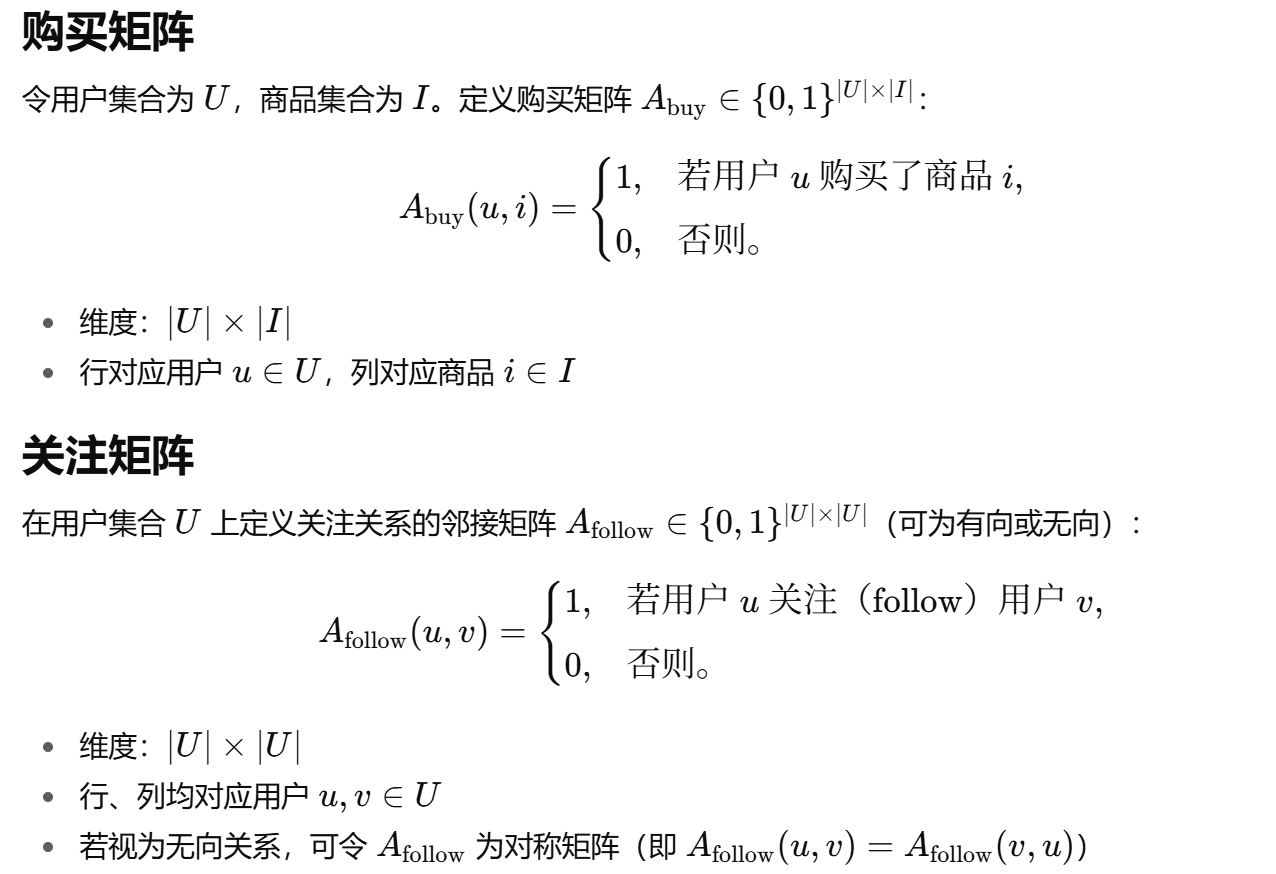

2. 二部子图

    看作多个二部子图的并集＝把跨类型关系拆成独立“小图”

    购买关系 U–I 本身就是二部图（左边全是U，右边全是I，只跨类连边）。

    类似地，作者A–论文P、论文P–会议V 都是二部子图。

    把这些子图“并起来”，就是整张异质图；同类型关系（如 U–U 关注）则是“同类子图”。

3. 元路径

    它不是具体节点序列，而是类型序列。例如：

        学术网中：A–P–V（作者→论文→会议）。

        A–P–A（作者→论文→作者）表示“合作”关系的模式。

    用途：

        相似度/特征：两位作者的相似度＝它们之间有多少条 A–P–A 路径（合作次数/共同论文）。

        推荐/检索：用户U→购买→商品I→属于→类别C→包含→其他商品I′（U–I–C–I′）可用来找“同类”商品。

# Heterogeneous Graph Embedding Made More Practical解读

为了解决图嵌入中元路径的不能广泛使用， 大多图算法无法捕捉复杂结构（同构）， GNN的大量消耗， SCHash中无法保留单形组成的复形，

所以采用 拉普拉斯->局部增强（位乘）->全局（矩阵乘法）->LSH



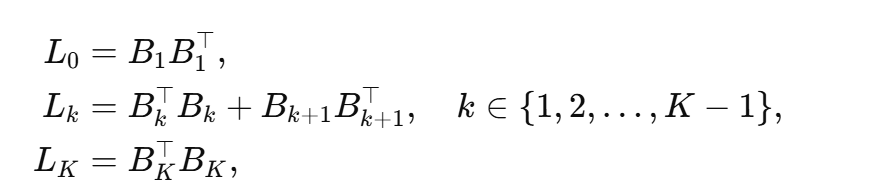


其中大概算法流程

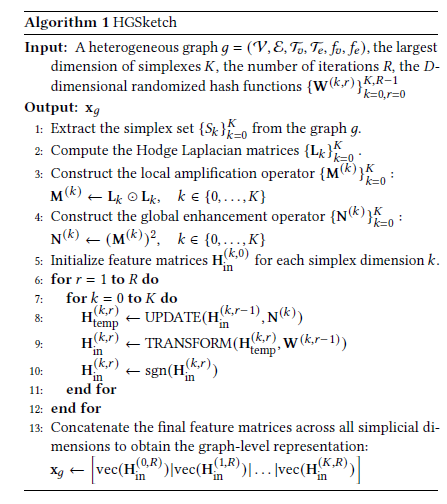


所以前四步其实是提供算子， 第五步是通过节点信息初始化特征（通过节点类型做聚合）

随后for循环中迭代r次 再将算子和初始化信息通过LSH来进行压缩

最后把从0-K单形的结果拼接在一起

其中由该算法得到的数据可以怎么利用， 分为两种情况

    一，非线性模型

    Hamming 核 = 两个签名“相同位的比例”。
    比如 L=8，两串比特有 6 位一样 ⇒ 核值=6/8=0.75。
    用这个核给 SVM，就能做分类/回归（这是“非线性”的做法，因为核=非线性相似度）。

    二，线性模型
    线性模型需要将Hamming核变成内积的形式输入
    把每个L位签名
    x 变成 2L 维 0/1 特征：
    前 L 维：第ℓ维写1表示“第ℓ位是1”，否则0
    后 L 维：第ℓ维写1表示“第ℓ位是0”，否则0

    HGSketch 的性能会受到哈希函数数目 D 与迭代次数 R 的影响。实验结果表明：当 D 与
    R 增加至某些临界点之前，准确率会提升；超过临界点后，进一步增大会引入噪声、使性能下降。举例来说，
    D=25的准确率优于D=20或 D=30。类似地，继续增大 R 会导致单形特征过度扩散，造成有效信息丢失。
    上述现象与现有研究一致，提示需谨慎地进行超参数调优。

# SCHash: Speedy Simplicial Complex Neural Networks via Randomized Hashing解读


## 边界算子：
高维度->低维
其中边界算子得到的结果的系数实质上是计算拉普拉斯矩阵中的列

### GCN

用于聚合和更新图的节点特征

### SimHash

即随机超平面分割二者向量

分割结果组成的01位为hash编码




# Node classification in networks via simplicial interactions

## 内容

这篇文章提出一个损失函数用于高阶网格/超图：当一个超边类的点被分到同一标签的概率越大那么损失越小， 反之当一个超边的点被分到同一标签的差别越大那么损失越大 在训练开始前，先用那一小部分已知标签节点，把未标注节点的初始类别概率算得更合理一点

随机分块张量模型（Stochastic Block Tensor Model, SBTM）可以更好的捕捉三角形 四面体的关系

目标函数与最先进（SOTA）的基于 GNN 的半监督学习技术相结合，从而获得额外的性能提升。 以及数据集是Cora、CiteSeer、PubMed

## 预备知识

### 构建高阶段网格

超边：团/单纯形，并用这些团当作超边来构成一个超图。这样就不止看“两点一条边”，而是把“多点一起”的关系当成一条“超边”。

即构建超图的过程是

    1. 得到全部0单形 k1
    2. 得到全部1单形 k2
    3. 得到全部2单形 k3
    4. 直到获取到最大的单形 之后全部并起来即可

### 基于图上随机游走的分类算法

一个经典的图随机游走算法是 某一个节点有k度 其到其他节点的概率是1/k

$$P_i(y)$$: 是通过随机游走到某一个有标签的点的最大概率

例如下方给个小例子解释如何计算图的拉普拉斯矩阵

#### L=D（度矩阵）-A（邻接矩阵）

如图A-B-C

**邻接矩阵 (A)：**
$$
A=\begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 1\\
0 & 1 & 0
\end{bmatrix}
$$

**度矩阵 (D)：**
$$
D=\begin{bmatrix}
1 & 0 & 0\\
0 & 2 & 0\\
0 & 0 & 1
\end{bmatrix}
$$

**拉普拉斯矩阵 (L=D-A)：**
$$
L=\begin{bmatrix}
1 & -1 & 0\\
-1 & 2 & -1\\
0 & -1 & 1
\end{bmatrix}
$$

#### u：定义在节点上的函数/向量（每个节点一个数，比如某类的概率）

如图A-B-C
$$ u_1=1,   u_2=2,  u_3=1 $$
$$ u=[u_1, u_2, u_3]^T $$
$$
u=\begin{bmatrix}
1\\
2\\
1
\end{bmatrix}
$$

---

## 随机游走基线：链式图示例

图：链 (1-2-3-4)，无权无向。
标注：节点 1 属于 **A 类**（记为第 (i) 类），节点 4 属于 **非 A 类**；2、3 未标注。

**拉普拉斯矩阵 (L=D-A)：**
$$
L=\begin{bmatrix}
1 & -1 & 0 & 0\
-1 & 2 & -1 & 0\
0 & -1 & 2 & -1\
0 & 0 & -1 & 1
\end{bmatrix}
$$

* **已标注集** (L={1,4})：(u(1)=1,\ u(4)=0)
* **未标注集** (U={2,3})：未知 (u(2),u(3))

**列方程（等价于“邻居平均”）：**
[
\begin{aligned}
\text{对 }2:\quad& -u(1) + 2u(2) - u(3) = 0 \ \Rightarrow\ 2u(2) - u(3) = 1,\
\text{对 }3:\quad& -u(2) + 2u(3) - u(4) = 0 \ \Rightarrow\ -u(2) + 2u(3) = 0.
\end{aligned}
]

**求解：**
[
u(3)=\tfrac{1}{3},\qquad u(2)=\tfrac{2}{3}.
]

**解释：**

* 从 2 出发，先到 A 的概率 (P_A(2)=\tfrac{2}{3})；
* 从 3 出发，先到 A 的概率 (P_A(3)=\tfrac{1}{3})。
  若只做二分类（A vs 非 A），则判定：(2\to A)，(3\to \text{非 A})。

---



## 模型部分

### 单纯形目标函数

把每个“高阶结构”（边、三角形、四面体…）里“标签越一致”当成奖励（损失越小），标签越杂当成惩罚（损失越大）；对所有高阶结构求和并加权，最小化它。

---

## $$单纯形目标函数里的 (C_\theta) 是什么？$$

**目的：**
在同一个高阶结构（边、三角形、四面体等）里，**标签越一致**越好（损失小），**越杂**越差（损失大）。(C_\theta) 用来按“**混杂程度**”给惩罚加权。

### 定义（多项式系数 / 多重组合数）

给定一个 (k) 点的单纯形，(\theta=(i_1,\dots,i_k)) 是这 (k) 个位置的标签序列。令

* (e_i)：标签 (i) 在 (\theta) 中出现的次数，且 (\sum_{i=1}^{\ell} e_i = k)。

则
$$
C_\theta ;=; \binom{k}{e_1,e_2,\dots,e_\ell}
;=; \frac{k!}{e_1!,e_2!\cdots e_\ell!}.
$$

> 含义：**同一种“标签个数组合”有多少种位置排列**。在目标函数里把同型项合并，需要乘上这个计数因子。

### 为什么“越杂越大”？

* 全同（如 AAA）：只有 1 种排列，(C=1)（最小）。
* 两类混合（如 AAB）：(\binom{3}{2,1}=3)。
* 三类全混（ABC）：(3!=6)（最大）。
  → **标签越杂，可排列越多，(C_\theta) 越大 → 惩罚越重**。

---

### 三角形（(k=3)）的极简例子

设三角形 (e={j_1,j_2,j_3})，二分类 (I={A,B})，节点概率为 ({p_{j_tA},p_{j_tB}})（(p_{j_tB}=1-p_{j_tA})）。

只看这个三角形对目标 (J) 的贡献（取 (w_3=1)）：
$$
\sum_{\theta\in I^3} C_\theta \; p_{j_1,i_1}\,p_{j_2,i_2}\,p_{j_3,i_3}
$$

按“同型”合并后等价于：
$$
\underbrace{p_{j_1 A}\,p_{j_2 A}\,p_{j_3 A}}_{\text{AAA},\;C=1}
\;+\;
\underbrace{\big(
p_{j_1 A}\,p_{j_2 A}\,p_{j_3 B}
+
p_{j_1 A}\,p_{j_2 B}\,p_{j_3 A}
+
p_{j_1 B}\,p_{j_2 A}\,p_{j_3 A}
\big)}_{\text{AAB 共3项},\;C=3}
\\[4pt]
\;+\;
\underbrace{\big(
p_{j_1 A}\,p_{j_2 B}\,p_{j_3 B}
+
p_{j_1 B}\,p_{j_2 A}\,p_{j_3 B}
+
p_{j_1 B}\,p_{j_2 B}\,p_{j_3 A}
\big)}_{\text{ABB 共3项},\;C=3}
\;+\;
\underbrace{p_{j_1 B}\,p_{j_2 B}\,p_{j_3 B}}_{\text{BBB},\;C=1}
$$


* 若三个点都强烈偏向同一类（如 **AAA/BBB** 项占主导，整体较小（惩罚轻）。
* 若三点各自偏不同类或接近均分，**AAB/ABB/ABC** 混杂项占多，乘上更大的 (C_\theta)，整体更大（惩罚重）。

---

* $$(C_\theta) 是同一标签个数组合的排列数$$；
* 越混杂 → $$(C_\theta)越大 → 惩罚越重$$；
* 最小化目标函数 (J) 会**鼓励同一单纯形内标签一致**，把“高阶结构的一致性”写进训练目标。


---

### 三角形对 (J) 的完整计算

 > 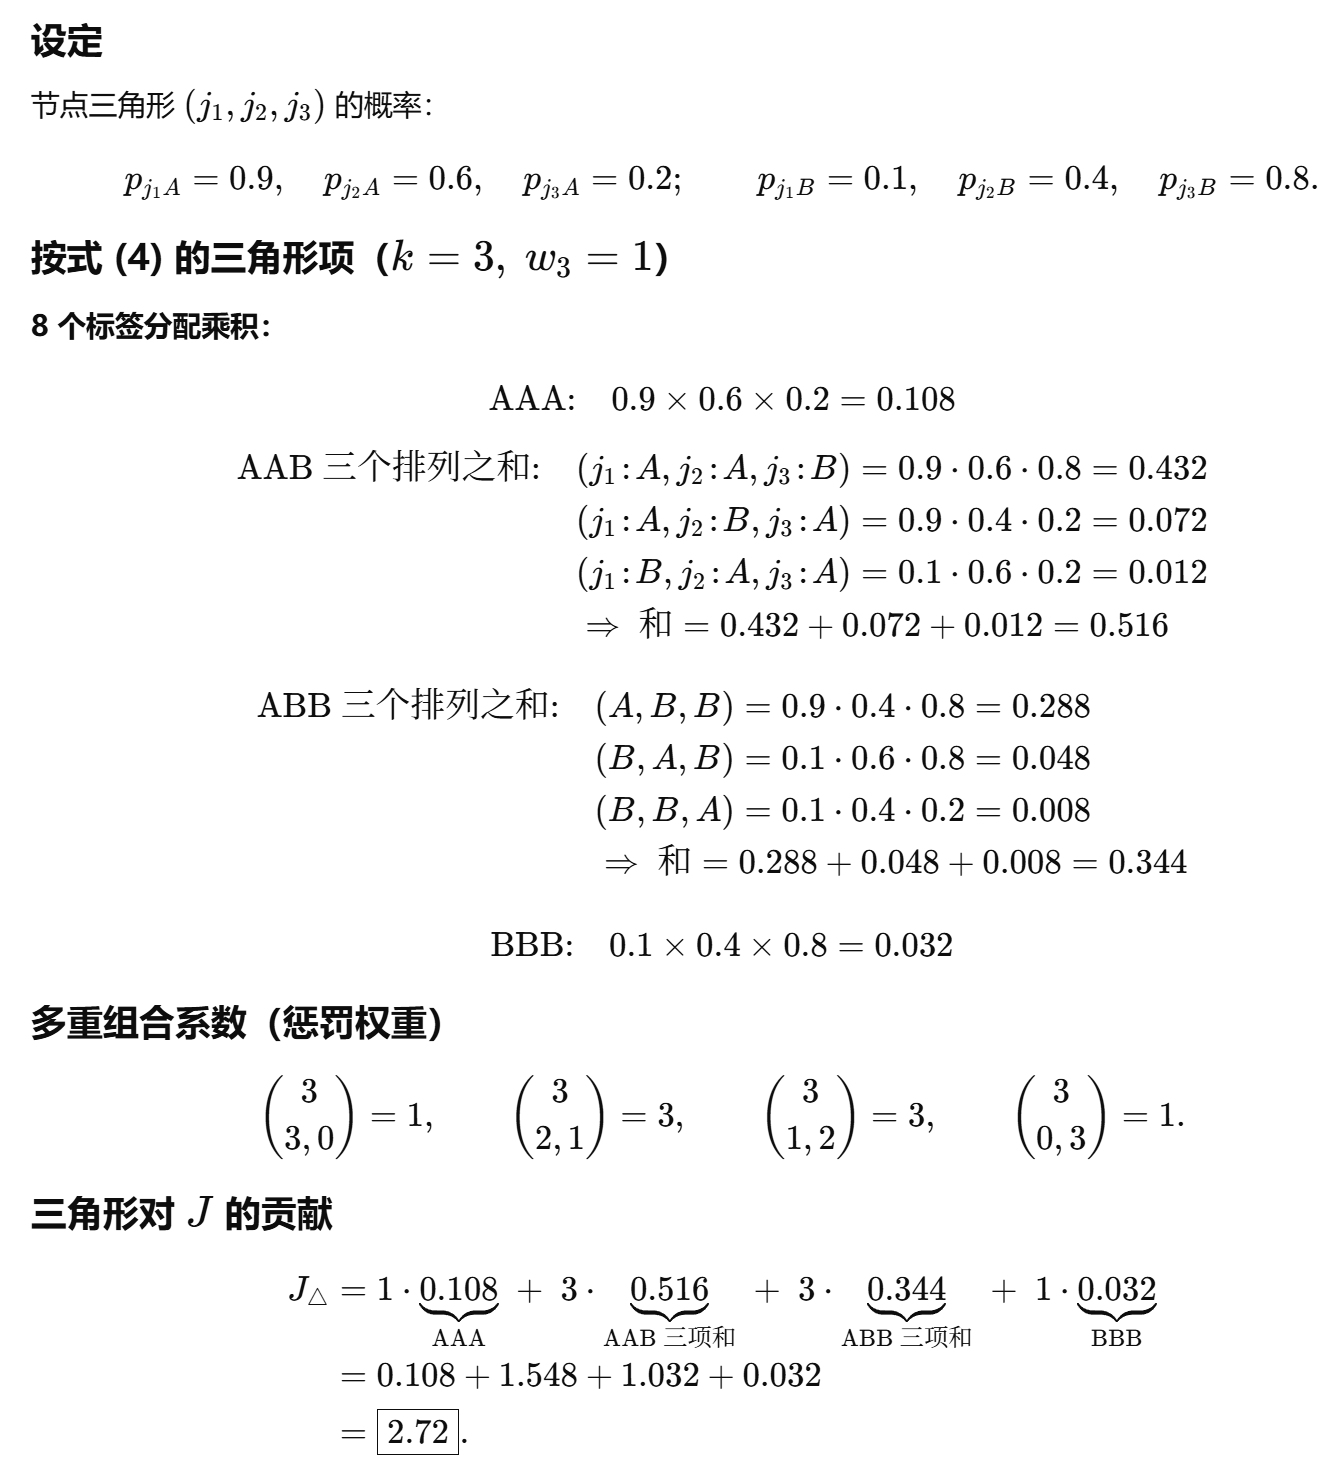

### SBTM: A New Graph Generation Approach

为了解决SBM无法捕捉更高阶的结构提出SBTM

下方是SBTM的造图过程

>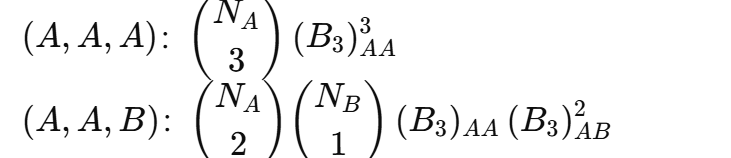
>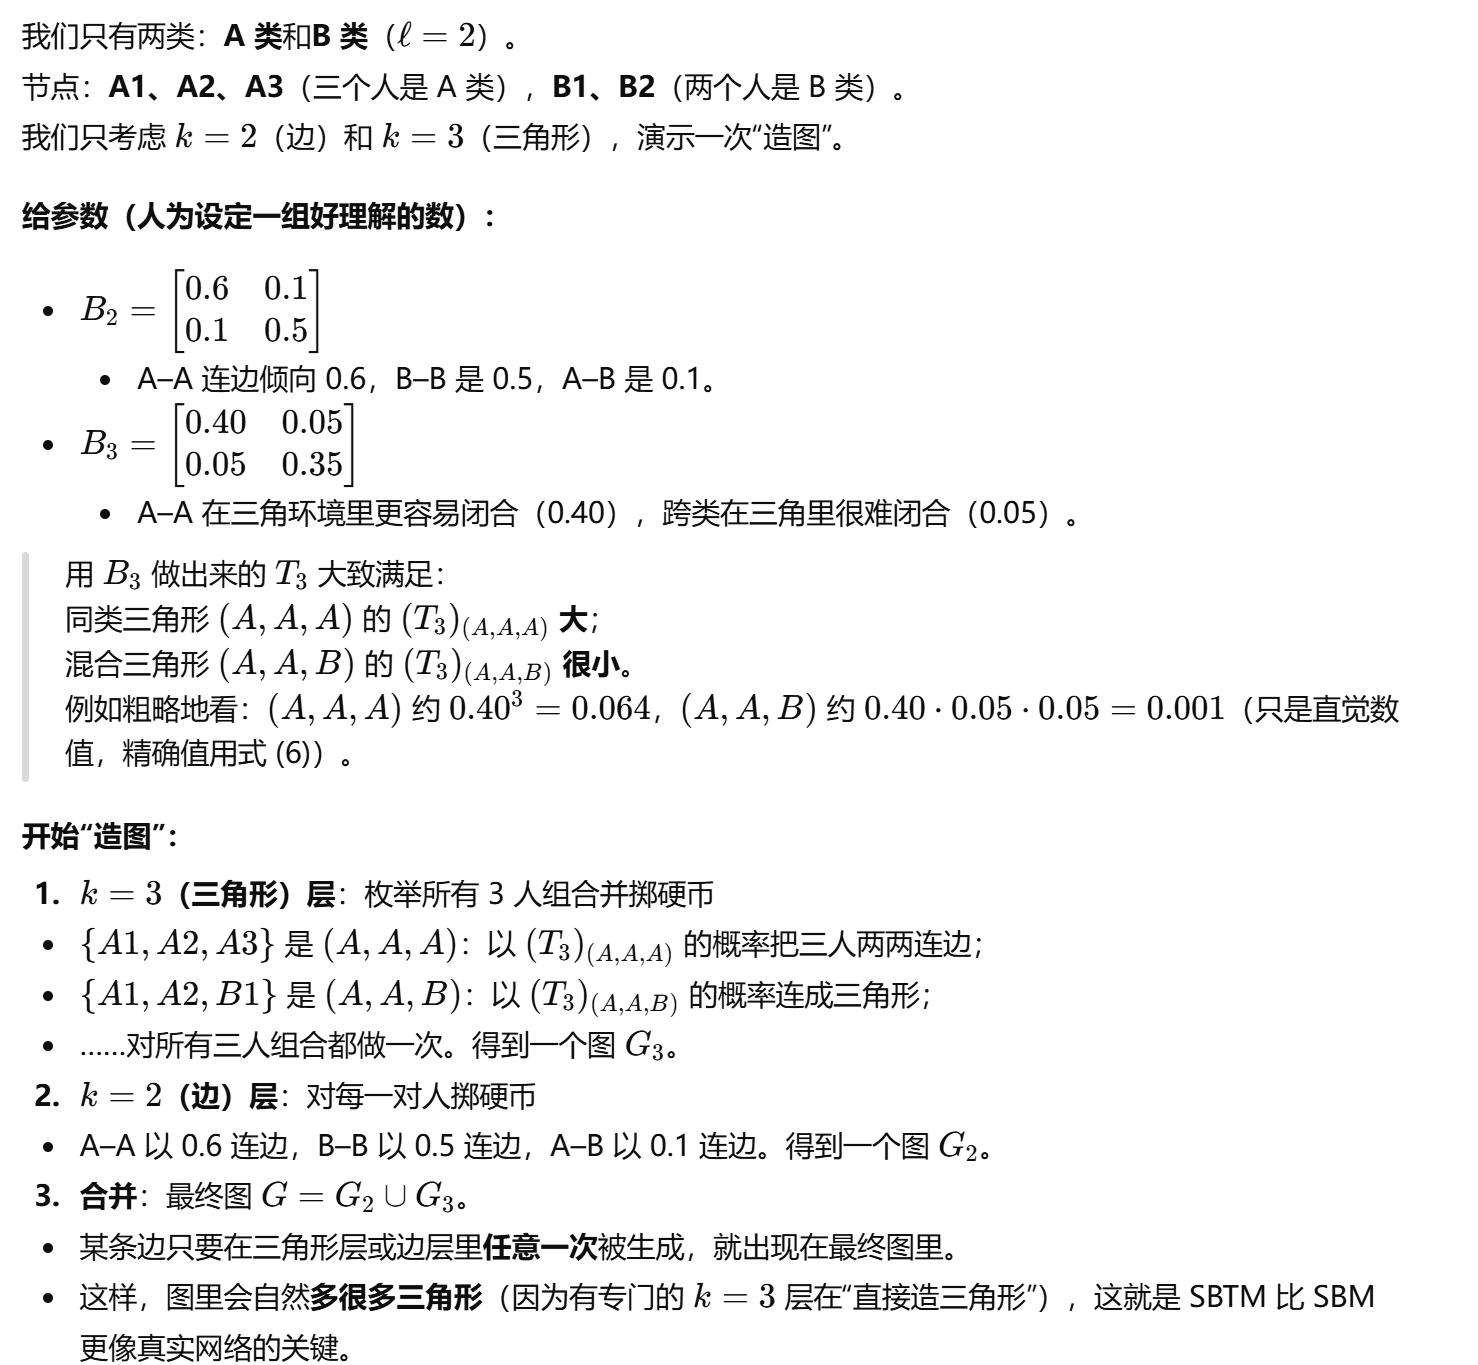


### 图半监督学习（GSSL）

图半监督学习（GSSL）的目标是：在只有少量、获取代价高的带标签数据的情况下，充分利用大量、获取代价低的无标签数据来提升模型效果。因此，半监督学习框架与许多难以获取标签的现实场景非常契合。根据一份分类框架，GSSL 可分为：图正则化方法、矩阵分解方法、随机游走方法、自编码器方法、以及GNN 方法。
只有很少的已标注节点，但有很多没标注的节点；我们用图的结构（谁和谁相连/邻居像不像）把这点点监督**“传染/扩散”**到没标注的节点上，从而一起学好分类。

## EXPERIMENTAL SETUP

把高阶关系（不只看边，还看三角形、四点团、五点团）写进损失函数，会不会让半监督分类更准

Cora：2708 个节点、5429 条无向引文边、7 个类别；

Citeseer：3327 个节点、4732 条边、6 个类别；

Pubmed：19 717 个节点、44 338 条边、3 个类别。

### RESULTS

#### Balanced

更难的图（低同类/高异类）+ 少量标签 ⇒ 高阶目标函数帮助最大。

SI-4 最佳：在均衡设置下，四点团的密度和稳定性介于三角形与五点团之间，既提供了边之外的强信号，又不过分稀疏，因而平均提升最高。


#### imbalanced

难场景（同类弱/异类强/标签少）⇒ 高阶一致性带来的提升更大；

不均衡图里，SI-4 通常是性价比最好的配置；

在不均衡/长尾网络、同类弱/异类强或标签很少时，给高阶团更大的权重是有益的。

经验上可从 𝛼=2∼3起步；若网络里 4/5-团非常丰富，可尝试 α=4，再看是否还有实质性涨幅。


#### 将目标函数与 GNN 集成

先用 GNN 得到每个节点属于各类的概率（softmax）→ 把这些概率当成初始值 → 用论文的高阶损失 J（惩罚同一 clique 里标签不一致）再优化一小会儿 → 精度再涨一点。

### 本文中单纯形是如何应用

1. 构建高阶段网格
2. 目标函数

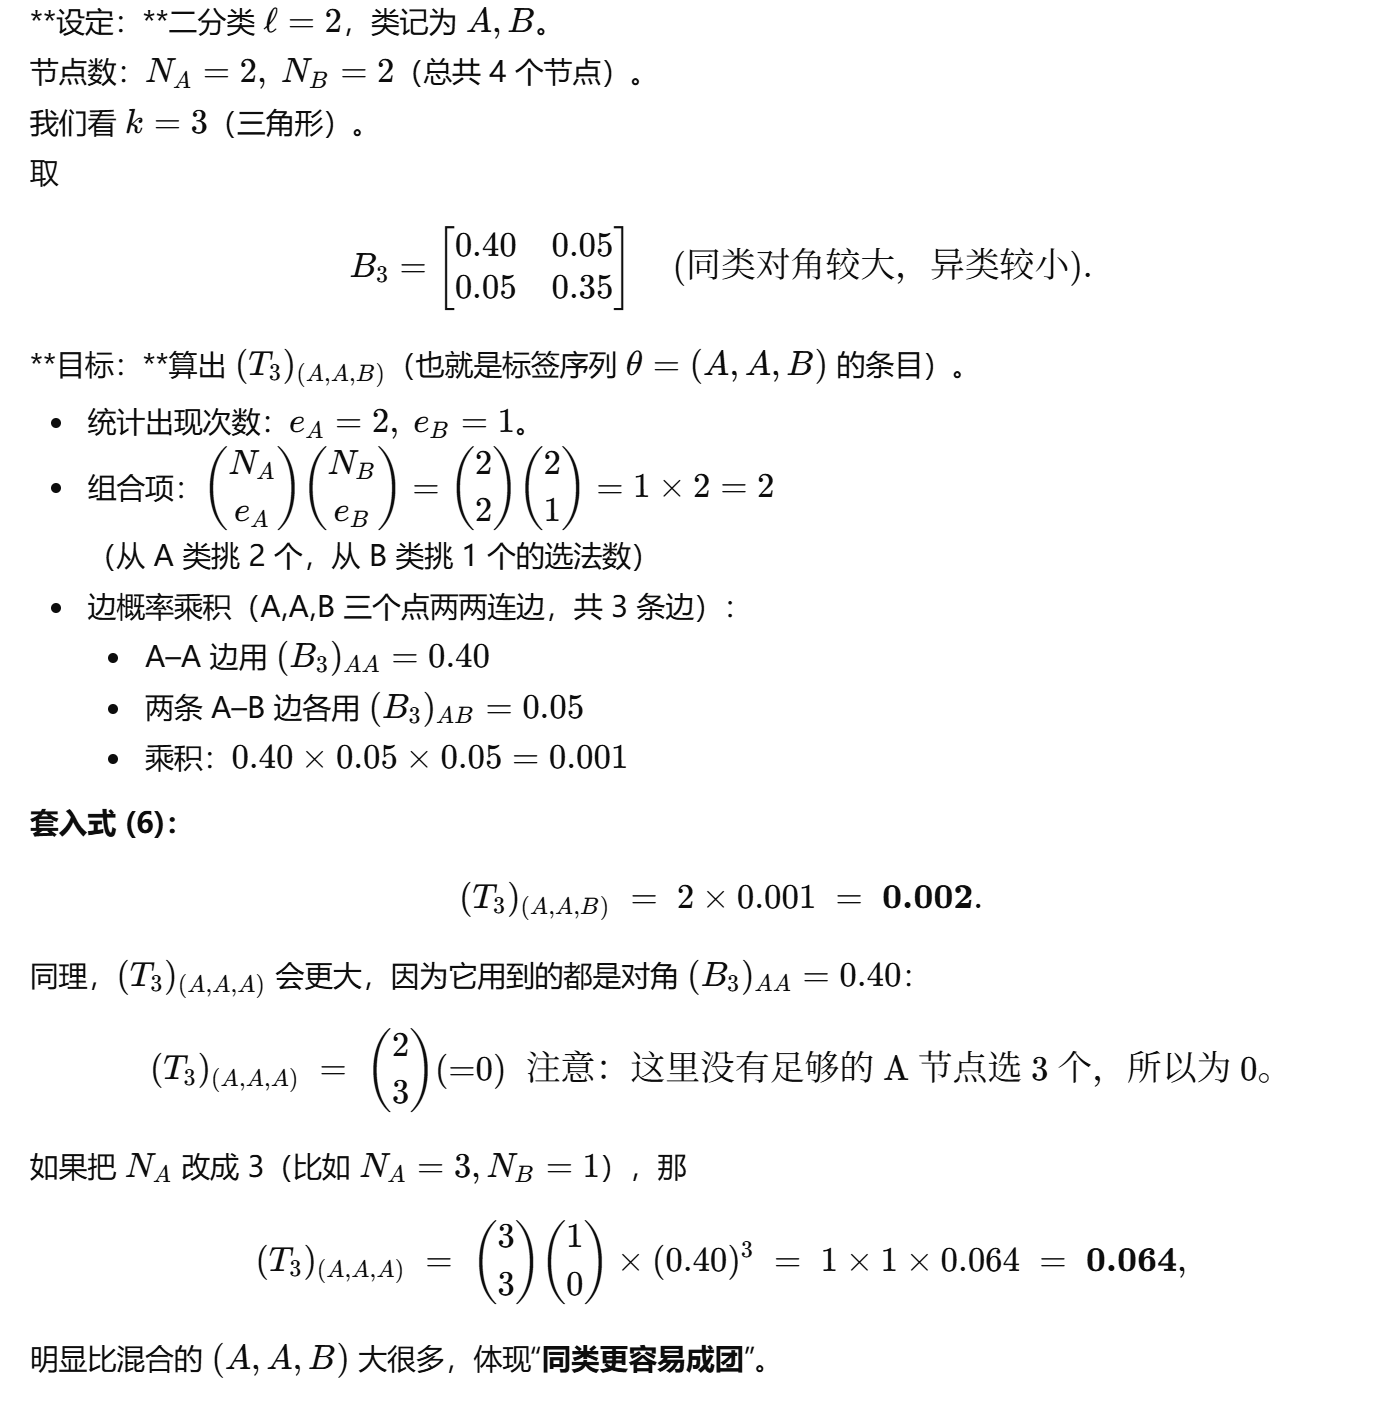